<a href="https://colab.research.google.com/github/AyushiMishra2303/Airdrums/blob/main/AyushiMishra_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#FFT ( Fast Fourier Transform)

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline


def FFT(x):
    """
    A recursive implementation of
    the 1D Cooley-Tukey FFT, the
    input should have a length of
    power of 2.
    """
    N = len(x)

    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)

        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X




<ipython-input-13-753891eb454d>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [ ]:
#DFT ( Discrete Fourier Transform )

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline


def DFT(x):
    """
    Function to calculate the
    discrete Fourier Transform
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X



In [ ]:
#Filter implementation using scipy

import numpy as np
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go

def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return noisy_signal

# Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1000  # Number of samples in the sine wave
nyq= 0.5*frequency
data = generate_noisy_sine_wave(frequency, amplitude, noise_level, num_samples)
cutoff = 2      # desired cutoff frequency of the filte
order = 2

def butter_lowpass_filter(data, cutoff, frequency, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, frequency, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

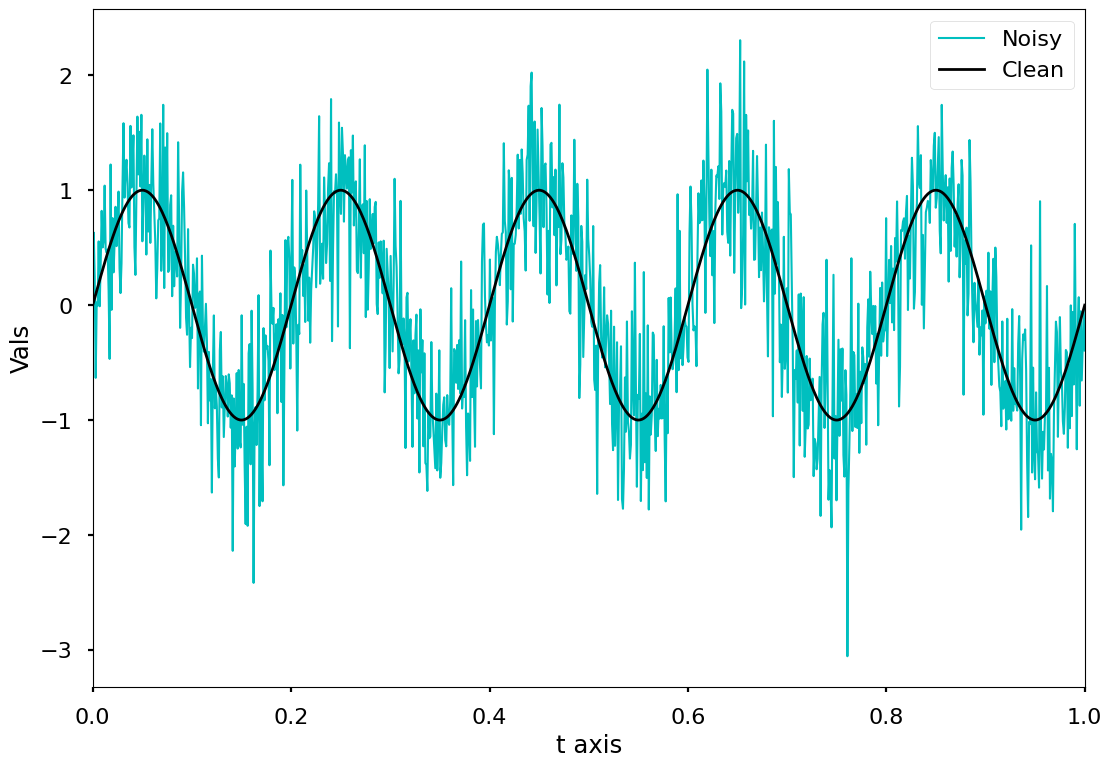

In [ ]:
# Plot of noisy signal
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('seaborn-poster')
%matplotlib inline


def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
   # return noisy_signal
    plt.plot(t, noisy_signal, color='c', linewidth=1.5, label='Noisy')
    plt.plot(t, clean_signal, color='k', linewidth=2, label='Clean')
    plt.xlim(t[0], t[-1])
    plt.xlabel('t axis')
    plt.ylabel('Vals')
    plt.legend()
    plt.show()

 # Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1000  # Number of samples in the sine wave

generate_noisy_sine_wave(frequency,amplitude,noise_level,num_samples)



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


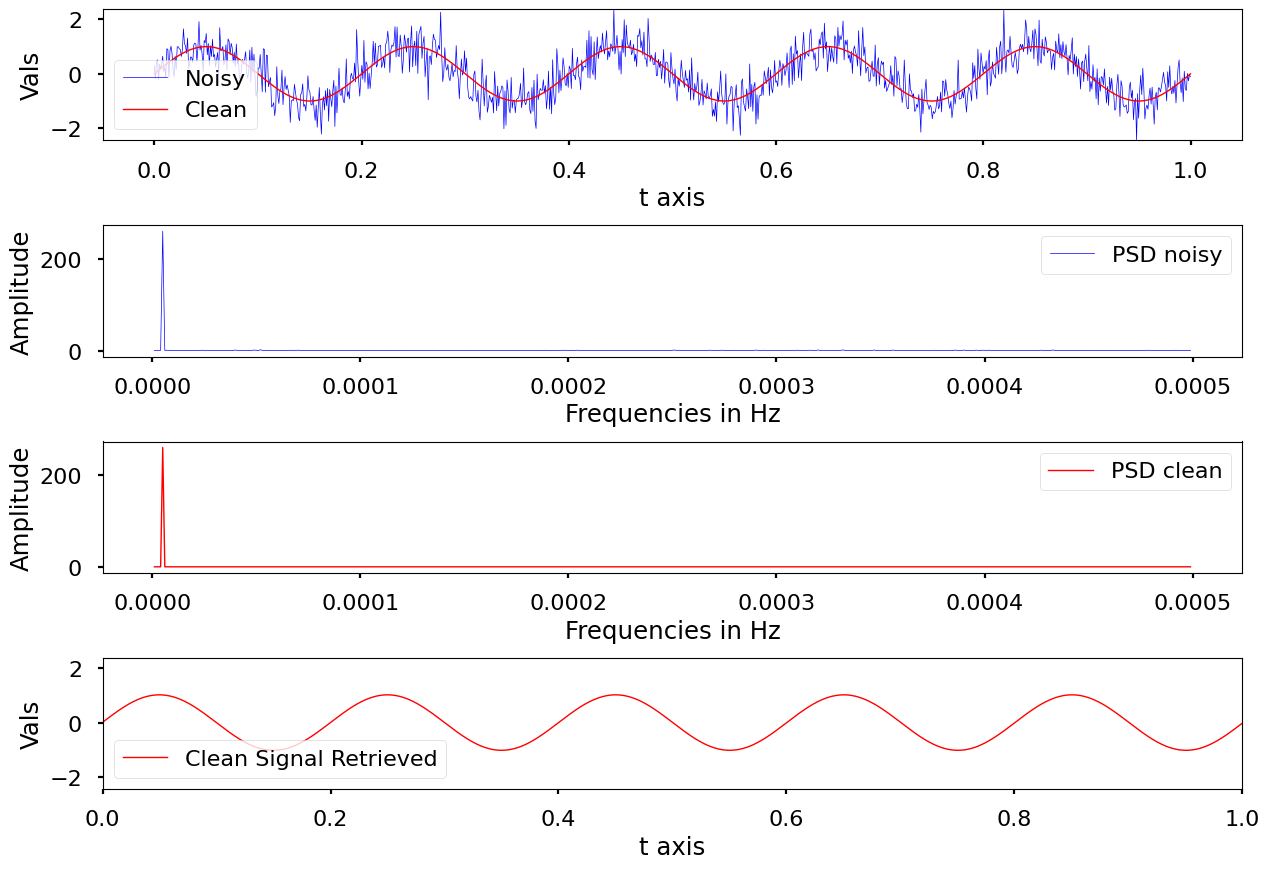

In [ ]:
#Filter the noisy signal provided and plot the filtered and unfiltered signals using matplotlib


def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    min_signal, max_signal = noisy_signal.min(), noisy_signal.max()

    # Compute the Fast Fourier Transform (FFT)

    n = len(t)
    fhat = np.fft.fft(noisy_signal, n)                 # Compute the FFT
    psd = fhat * np.conj(fhat) / n
    freq = (1 / (num_samples * n)) * np.arange(n)    # frequency array
    idxs_half = np.arange(1, np.floor(n / 2), dtype=np.int32)  # first half index

    threshold = 100
    psd_idxs = psd > threshold # array of 0 and 1
    psd_clean = psd * psd_idxs # zero out all the unnecessary powers
    fhat_clean = psd_idxs * fhat # used to retreive the signal

    signal_filtered = np.fft.ifft(fhat_clean) # inverse fourier transform


    # plt.rcParams['figure.figsize'] = [8,10]
    fig, axs = plt.subplots(4, 1)

    plt.sca(axs[0])
    plt.plot(t, noisy_signal, color='b', linewidth=0.5, label='Noisy')
    plt.plot(t, clean_signal, color='r', linewidth=1, label='Clean')
    plt.ylim(min_signal, max_signal)
    plt.xlabel('t axis')
    plt.ylabel('Vals')
    plt.legend()

    plt.sca(axs[1])
    plt.plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', linewidth=0.5, label='PSD noisy')
    plt.xlabel('Frequencies in Hz')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.sca(axs[2])
    plt.plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', linewidth=1, label='PSD clean')
    plt.xlabel('Frequencies in Hz')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.sca(axs[3])
    plt.plot(t, signal_filtered, color='r', linewidth=1, label='Clean Signal Retrieved')
    plt.xlim(t[0], t[-1])
    plt.ylim(min_signal, max_signal)
    plt.xlabel('t axis')
    plt.ylabel('Vals')
    plt.legend()

    plt.tight_layout()





# Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1000  # Number of samples in the sine wave


generate_noisy_sine_wave(frequency,amplitude,noise_level,num_samples)


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('seaborn-poster')
%matplotlib inline


def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return noisy_signal

# Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1000  # Number of samples in the sine wave


def FFT(x):
    """
    A recursive implementation of
    the 1D Cooley-Tukey FFT, the
    input should have a length of
    power of 2.
    """
    N = len(x)

    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)

        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X




x=generate_noisy_sine_wave(frequency,amplitude,noise_level,num_samples)
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
freq = freq = np.fft.fftfreq(n.shape[-1])

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

ValueError: could not broadcast input array from shape (1000,) into shape (1,)

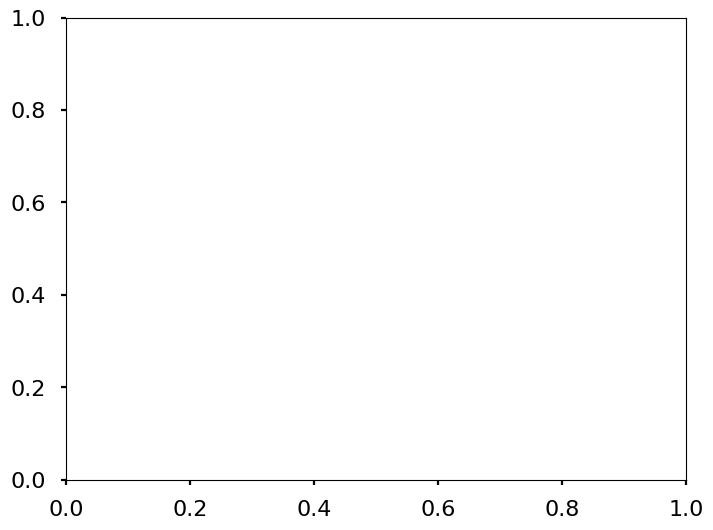

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('seaborn-poster')
%matplotlib inline


def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return noisy_signal

# Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1000  # Number of samples in the sine wave

def DFT(x):
    """
    Function to calculate the
    discrete Fourier Transform
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

x=generate_noisy_sine_wave(frequency,amplitude,noise_level,num_samples)
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
freq = frequency

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()
